# 鐵達尼號生存預測

## 處理流程如下
- 問題定義
- 區分訓練集與測試集
- 數據整理、特徵工程
- 分析並進行數據挖掘
- 建模
- 結果視覺化
- Submit

## 問題定義
- 1912年4月15日，鐵達尼號與冰山相撞後沉沒，在2224名乘客和船員中造成1502人死亡。只有32%的存活率。
- 其中一個導致了在這場海難中損失如此多生命的原因是乘客和船員沒有足夠多的救生船。
- 儘管在這次沉船事件中有一些運氣的原因，但是一些像女人，孩子，上層人士這類人比其他人倖存的概率更大。



## 工作流程
1. 分類。對樣本進行分類，了解不同類的樣本別對於方案的影響
2. 相關性。了解變數之間的相關性有助於建置模型
3. 轉化。數據中要將文字轉數值
4. 完成數據整理。確認無遺漏值、離群值等
5. 修正。修正離群值與缺漏值，必要時除該變數
6. 建立新變數。透過現有的變數創建出新變數，該變數繼承其相關性等。
7. 視覺化。

### 載入套件

In [225]:
#數據分析
import pandas as pd
import numpy as np
import random as rd

#視覺化
import seaborn as sns
import matplotlib.pyplot as plt

#不跳出頁面，直接在jupyter中顯示
%matplotlib inline

#機器學習
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 數據整理

In [265]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_combine = [train_df,test_df]

### 數據描述分析



In [227]:
#數據中所有變數名稱
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### 確認數據型態
1. 某些欄位為連續型態如 Age、Fare
2. 某些欄位為離散型態如 Parch
3. 某些欄位為混合型態(字母+數字)如 Cabin、Ticket
4. 某些欄位中存在中null或空值 如Cabin

In [228]:
#預覽前五行數據
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
df_train.info()
print('-'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

### 數值型的變數所代表的訊息
- Survived為0和1的分類值，用於表示存活
- 75%以上的乘客沒有攜家帶眷
- 30%的乘客有兄弟姊妹或配偶
- 票價幾乎沒有存在顯著差異、因只有1%的人支付高額的票價
- 65歲以上的乘客也非常少

In [213]:
#object 類別
#float64 純數值
#int64 有意義排列之數值


print(df_train.describe(include=['int64']))
print('_'*80)
print(df_train.describe(include=['float64']))


#大約38%的人存活

       PassengerId    Survived      Pclass       SibSp       Parch
count   891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642    0.523008    0.381594
std     257.353842    0.486592    0.836071    1.102743    0.806057
min       1.000000    0.000000    1.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000    0.000000    0.000000
50%     446.000000    0.000000    3.000000    0.000000    0.000000
75%     668.500000    1.000000    3.000000    1.000000    0.000000
max     891.000000    1.000000    3.000000    8.000000    6.000000
________________________________________________________________________________
              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


### 分類型的變數所代表的訊息
- Name在數據中唯一不重複
- Sex只有0或1，約65%為男性
- Cabin有些為重複，因好幾個旅客共享一個船艙
- Ticket有很多重複值

In [192]:
print(df_train.describe(include=['object']))

                         Name   Sex  Ticket        Cabin Embarked
count                     891   891     891          204      889
unique                    891     2     681          147        3
top     Campbell, Mr. William  male  347082  C23 C25 C27        S
freq                        1   577       7            4      644


### 相關性

每一個變數與存活率的相關程度是多少?

### 修正
- Ticket在數據中有著極高的重複比例，且與存活率較無相關性，因此可以捨棄
- Cabin有著大量的不正確與空值，因此可以丟棄
- PassengerID與存活率無相關
- Name與存活率無相關

### 創造變數
- 藉由Parch與Sibsp的家庭型態特徵創造出乘客家庭成員總數
- 設計藉由Name中的特徵Title形成一個新的特徵
- 將年齡由連續的數值型態，轉變為間斷型態

### 分類
#### 基於前項說明預設如下。
- 女性(Sex = female)更容易存活。
- 兒童(Age< ??)更容易獲救。
- 社會地位高的人士(Pclass = 1) 更容易獲救。

### 交叉分析驗證預設
- Pclas與Survived交叉分析，Pclass=1確實更容易獲救
- Female有74%存活率


In [229]:
print(df_train[['Survived','Pclass']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)
)

print('_'*20)

print(df_train[['Survived','Sex']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
)

print('_'*20)

print(df_train[['Survived','SibSp']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
)

print('_'*20)

print(df_train[['Survived','Parch']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)
)


#sort_values(by='Survived',ascending=False)  調整Survived排序

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
____________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
____________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


### 確認數據內容-年齡

- 嬰兒(age<4)有較高的存活率
- 老年人(age>80)有較高的存活率
- 15-25幾乎都沒有存活

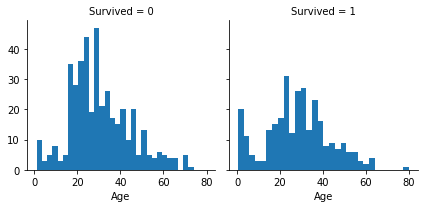

In [194]:
g = sns.FacetGrid(df_train,col = 'Survived')
g.map(plt.hist,'Age',bins= 30)

### 確認數據內容-階級
- 大部分乘客屬於Pclass = 3，但大多都沒有存活
- Pclass = 2 ，Pclass = 1的嬰兒(Age<4)存活率高，驗證前述假設
- Pclass = 1 存活率非常高，驗證前項假設。

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


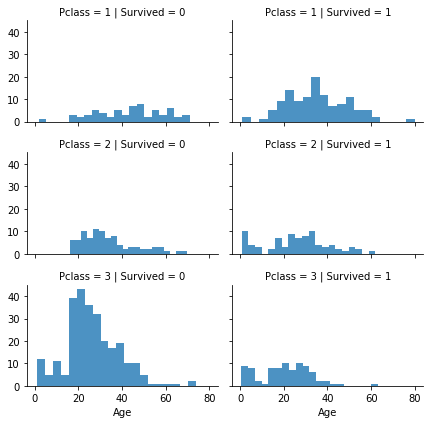

In [230]:
# 直方圖（hist）
# 散佈圖（scatter）
# 線圖（Line plot）
# 點圖(pointplot)
# 長條圖（barplot）
# 盒鬚圖（Box plot）
# 條件數據圖(FacetGrid)根據子集數據分別實例化對應的坐標軸，然後繪製出對應的圖形

###3*n形式呈現###
#grid = sns.FacetGrid(train_df,col='Pclass',hue='Survived') 
#size決定高度，aspect長寬比
grid = sns.FacetGrid(df_train,col='Survived',row='Pclass',size=2.0,aspect=1.5)
grid.map(plt.hist,'Age',bins = 20 ,alpha = 0.8)  #bin=上下界，alpha代表顏色深淺
grid.add_legend() #添加圖例

### 確認數據內容-性別、港口、存活率
- 女性乘客存活率高，證實前項假設
- Embarked=C的男性有更高的存活率，Pclass與Embraked有一定的關聯性
- C、Q港口中的屬於Pclass = 2與Pclass = 3有更高的存活率
- 乘船的港口將會改變Pclass = 3 男性乘客的存活率

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


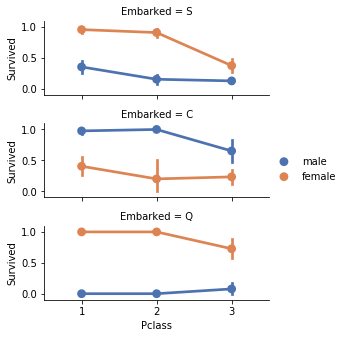

In [196]:
#sns.Facetgrid(data,row = 分類欄位名稱,size=高度,aspect = 長寬比)
#.map(sns = 表格樣式,''呈現資訊欄位',palette = 'deep')
grid = sns.FacetGrid(df_train,row = "Embarked", size = 1.6, aspect=2.5)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette = 'deep')
grid.add_legend()

### 確認數據內容-票價與上船港口
#### 考量Embarked、Sex、Fare、Survived間的關係

- 票價高的乘客存活率越高
- 上船的港口與存活率有相關

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


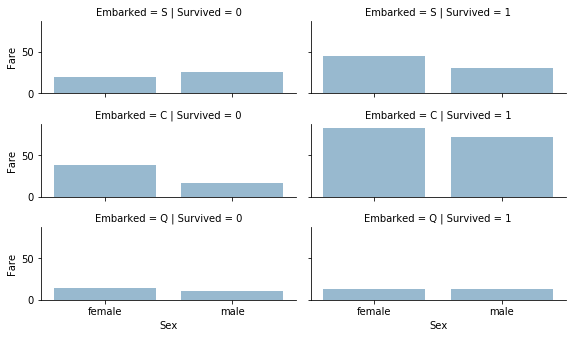

In [197]:
grid = sns.FacetGrid(df_train,row = 'Embarked',col = 'Survived',size = 1.6,aspect=2.5)
grid.map(sns.barplot,'Sex','Fare',alpha=.5,ci=None)
grid.add_legend()

### 移除對於存活較無相關的變數

In [266]:
print('Before:',df_train.shape,df_test.shape,df_combine[0].shape,df_combine[1].shape)
#移除變數
df_train = df_train.drop(['Ticket', 'Cabin'], axis = 1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis = 1)

df_combine = [df_train,df_test]

'After:',df_train.shape,df_test.shape,df_combine[0].shape,df_combine[1].shape


Before: (891, 12) (418, 11) (891, 13) (418, 12)


('After:', (891, 10), (418, 9), (891, 10), (418, 9))

### 創造新的變數
- Title 與年齡會有相關，例如Master的Title為5歲...
- Title 在不同的年齡段會有不同的存活率
- 某些特定Title都順利存活

In [267]:
for Titanic in df_combine:
    Titanic['Title'] = Titanic.Name.str.extract('([A-Za-z]+\.)',expand = False)
pd.crosstab(df_train['Title'],df_train['Sex'])

Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [268]:
df_train[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
16,Sir.,1.000000
2,Countess.,1.000000
14,Ms.,1.000000
11,Mme.,1.000000
6,Lady.,1.000000
10,Mlle.,1.000000
13,Mrs.,0.792000
9,Miss.,0.697802
8,Master.,0.575000
1,Col.,0.500000


In [269]:
#將Title轉換成編碼
title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Rare.": 5}
for Titanic in df_combine:
    Titanic['Title'] = Titanic['Title'].map(title_mapping)
    Titanic['Title'] = Titanic['Title'].fillna(0)

In [270]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


### 丟棄無用變數

In [271]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
df_combine = [df_train, df_test]
df_train.shape, df_train.shape

((891, 9), (891, 9))

### 轉換分類變數-性別

In [272]:
for Titnaic in df_combine:
    Titnaic['Sex'] = Titnaic['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [273]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1.0
1,1,1,1,38.0,1,0,71.2833,C,3.0
2,1,3,1,26.0,0,0,7.9250,S,2.0
3,1,1,1,35.0,1,0,53.1000,S,3.0
4,0,3,0,35.0,0,0,8.0500,S,1.0


### 解決有缺失值與空值的變數-年齡

1. 透過平均值或標準差補足空值或缺失值
2. 透過其他有關連的變數集合出Age的中位數預測Age值。也就是Pclass=1，Gender=0，Pclass=1,Gebder=1 等等組成的集合Age的中位數為年齡的值
3. 整合1與2，透過平均數與標準差間的隨機數值。 

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


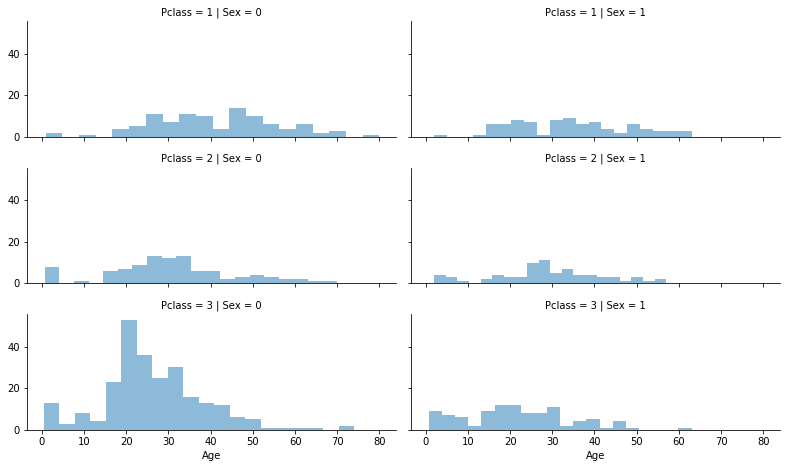

In [274]:
## grid = sns.FacetGrid(df_train, col='Pclass', hue='Gender')
grid = sns.FacetGrid(df_train,row = 'Pclass',col = 'Sex',size = 2.2,aspect=2.5)
grid.map(plt.hist, 'Age',alpha = 0.5,bins = 20)
grid.add_legend()

In [283]:
#建立一欄位保存 Pclass x Gender 的猜測值
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [284]:
#計算猜測的年齡值
for Titanic in df_combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = Titanic[(Titanic['Sex'] == i) & \
                                  (Titanic['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            Titanic.loc[ (Titanic.Age.isnull()) & (Titanic.Sex == i) & (Titanic.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    Titanic['Age'] = Titanic['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [288]:
# 建立年齡區間
df_train['AgeBand'] = pd.cut(df_train['Age'],5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [297]:
#將年齡段定義詞序替換掉數值
for Titanic in df_combine:
    Titanic.loc[Titanic['Age'] <= 16,'Age'] = 0

In [310]:
#df_train[df_train.Age < 26] 篩選用

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1.0,"(16.0, 32.0]"
5,0,3,0,25,0,0,8.4583,Q,1.0,"(16.0, 32.0]"
7,0,3,0,0,3,1,21.0750,S,4.0,"(-0.08, 16.0]"
9,1,2,1,0,1,0,30.0708,C,3.0,"(-0.08, 16.0]"
10,1,3,1,0,1,1,16.7000,S,2.0,"(-0.08, 16.0]"
...,...,...,...,...,...,...,...,...,...,...
880,1,2,1,25,0,1,26.0000,S,3.0,"(16.0, 32.0]"
882,0,3,1,22,0,0,10.5167,S,2.0,"(16.0, 32.0]"
884,0,3,0,25,0,0,7.0500,S,1.0,"(16.0, 32.0]"
887,1,1,1,19,0,0,30.0000,S,2.0,"(16.0, 32.0]"
